# Annotated follow-along guide: Date string manipulations with Python

This notebook contains the code used in the following instructional video: [Date string manipulations with Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/0GjvK/date-string-manipulations-with-python)

## Introduction

Throughout this notebook, we will practice manipulating date strings in Python. Before getting started, watch the associated instructional video and complete the in-video question. All of the code we will be implementing and related instructions are contained in this notebook.

## Overview

In this notebook, we will work with 2016–2018 lightning strike data from the National Oceanic and Atmospheric Association (NOAA) to calculate weekly sums of lightning strikes and plot them on a bar graph. Then, we will calculate quarterly lightning strike totals and plot them on bar graphs.

## Import packages and libraries

Before getting started, we will need to import all the required libraries and extensions. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

In [47]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
# Read in the data.
df = pd.read_csv('eda_manipulate_date_strings_with_python.csv')
df

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)
...,...,...,...
10478998,2018-05-27,13,POINT(-111.3 41)
10478999,2018-05-27,13,POINT(-109.4 43.4)
10479000,2018-05-27,13,POINT(-104.2 50)
10479001,2018-05-27,13,POINT(-88.7 36.4)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


## Create new time columns

As with similar datasets you have worked with, the `date` column data type is a string object, which limits what you can do with the data in this column. Converting the column to datetime will enable you to work with this data much more easily.  

In [50]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [51]:
df

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)
...,...,...,...
10478998,2018-05-27,13,POINT(-111.3 41)
10478999,2018-05-27,13,POINT(-109.4 43.4)
10479000,2018-05-27,13,POINT(-104.2 50)
10479001,2018-05-27,13,POINT(-88.7 36.4)


Next, let's create four new columns: `week`, `month`, `quarter`, and `year`. We can do this by using the `datetime.strftime()` method of the datetime object. `strftime` is short for "string format time." We will use this method on the datetime data in the `week` column, and it will extract the information we specify, formatted as a string. 

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the [strftime format codes documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). In this case, we will use `%Y` for year, `%V` for week number, `%q` for quarter.

**NOTE:** The following process might take a minute or two to complete.

In [52]:
df["date"].dtype

dtype('<M8[ns]')

In [53]:
df["week"] = df["date"].dt.strftime("%Y-W%V")
df["week"].head()

0    2016-W31
1    2016-W31
2    2016-W31
3    2016-W31
4    2016-W31
Name: week, dtype: object

In [54]:
df["month"] = df["date"].dt.strftime("%Y-%m")
df["month"].head()

0    2016-08
1    2016-08
2    2016-08
3    2016-08
4    2016-08
Name: month, dtype: object

In [55]:
df["quarter"] = df["date"].dt.to_period("Q").dt.strftime("%Y-Q%q")
df["quarter"].head()

0    2016-Q3
1    2016-Q3
2    2016-Q3
3    2016-Q3
4    2016-Q3
Name: quarter, dtype: object

In [56]:
df["year"] = df["date"].dt.strftime("%Y")
df["year"].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: year, dtype: object

Let's use `head()` to check that the columns were created as intended.

In [57]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


## Plot the number of weekly lightning strikes in 2018

Next, we will plot the number of weekly lightning strikes. Let's start by filtering the original dataset to 2018. We will use the `groupby()` and `sum()` functions to get the number of strikes per week.

In [82]:
df["year"].unique()

array(['2016', '2018', '2017'], dtype=object)

In [84]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week'])["number_of_strikes"].sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Now we have a table of exactly what we need to plot the weekly lightning strike totals of 2018. We will use the `plt.bar()` function to plot the bar graph. Within the argument field, let's input the x-axis (the `week` column), then input the y-axis (or height) as the `number_of_strikes` column. 

We will use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

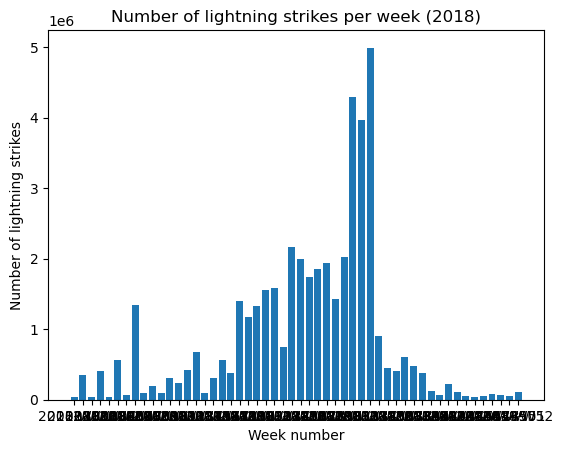

In [85]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

### Adjust the graph size

We now have a graph, but we can't read the x-axis labels. To fix this problem, first we will make it bigger by using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide by 5 inches tall.

Next, we will use the `plt.xticks()` function to access the tick labels on the x-axis. Using the `rotation` and `fontsize` keyword arguments, rotate the labels and make the font smaller.

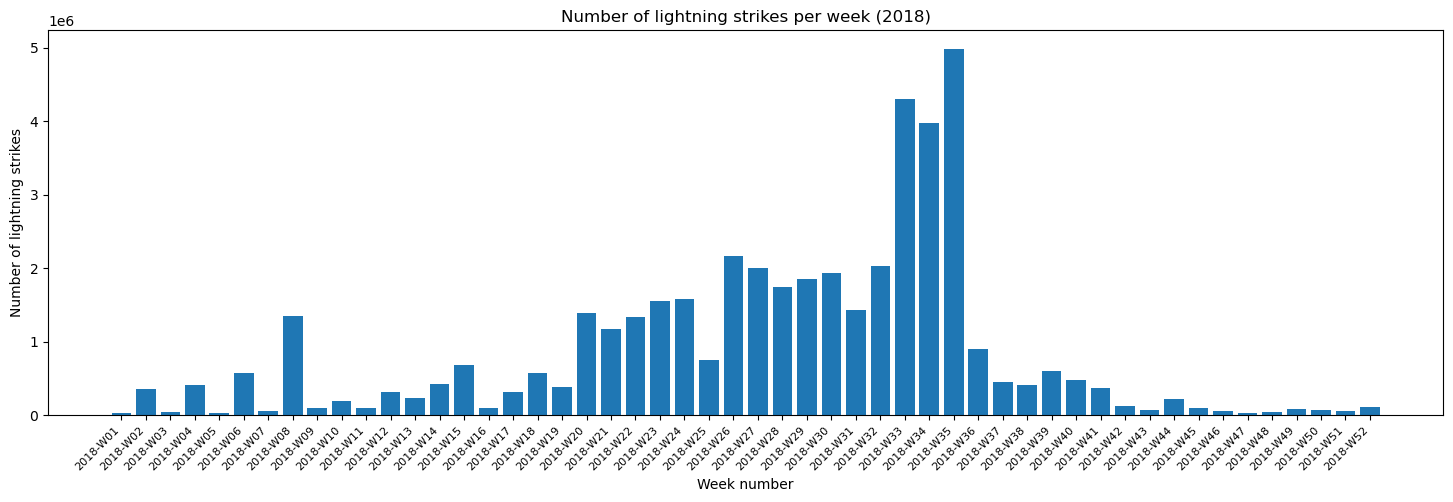

In [97]:
plt.figure(figsize = (18, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8, horizontalalignment = "right") # Rotate x-axis labels and decrease font size.

plt.show()

## Plot the number of quarterly lightning strikes from 2016–2018

Next, let's plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. As an example, the following code will divide the `number_of_strikes` column by one million.

In [118]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

### Format the numbers

This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well.  Let's begin by grouping the data by quarter and summing.

Then, we will create a `number_of_strikes_formatted` column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [122]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby("quarter")["number_of_strikes"].sum().reset_index()
df_by_quarter

,quarter,number_of_strikes
0,2016-Q1,2683798
1,2016-Q2,15084857
2,2016-Q3,21843820
3,2016-Q4,1969754
4,2017-Q1,2444279
5,2017-Q2,13548585
6,2017-Q3,17277461
7,2017-Q4,1824870
8,2018-Q1,3785528
9,2018-Q2,12136148


In [135]:
# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add labels

Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x-axis coordinates, `y` represents the y-axis coordinates, and `s` represents the text that we want to appear at these coordinates. 

**Reference:** [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [140]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### Plot the bar graph

Next, let's plot the bar graph. 

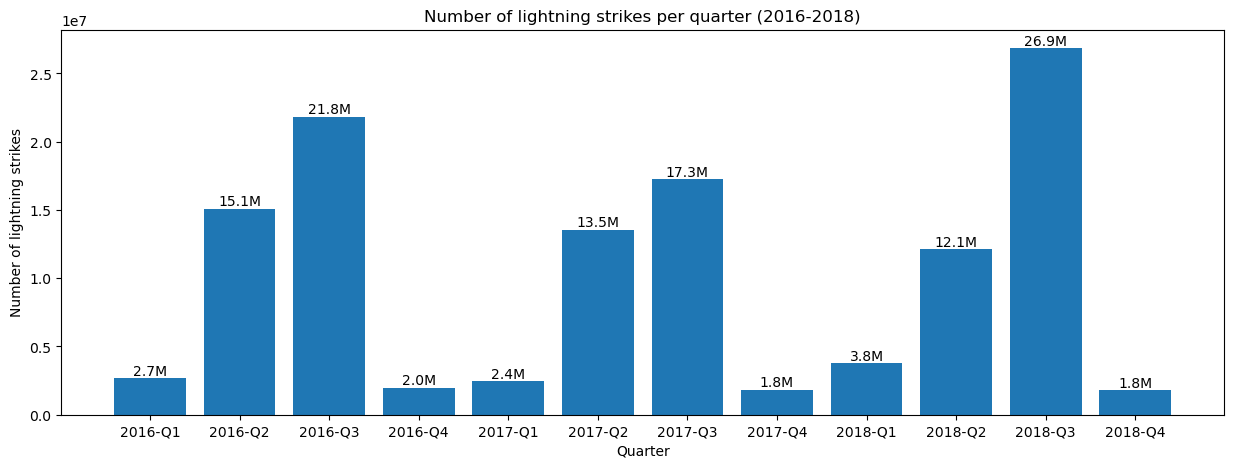

In [141]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

### Create a grouped bar chart

Now, we will create a grouped bar chart to better compare year-over-year changes each quarter. We can do this by creating two new columns that break out the quarter and year from the `quarter` column. We will use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [143]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


### Fill in the chart parameters

Next, fill in the bar chart parameters. 

In [145]:
df_by_quarter

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017
5,2017-Q2,13548585,13.5M,Q2,2017
6,2017-Q3,17277461,17.3M,Q3,2017
7,2017-Q4,1824870,1.8M,Q4,2017
8,2018-Q1,3785528,3.8M,Q1,2018
9,2018-Q2,12136148,12.1M,Q2,2018


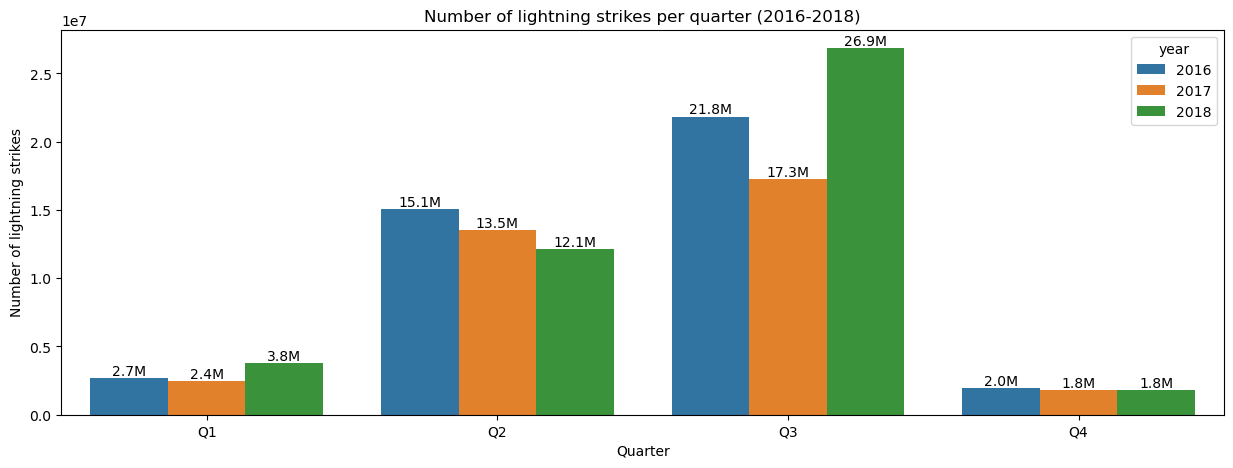

In [154]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

## Conclusion

**Congratulations!** You've completed this lab. You now understand how to manipulate date strings in Python and should be able to start using it on your own datasets.

You may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.